### TECH MAHINDRA VS TCS 
#### by Bibhash Kalita

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [10]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 5, 9)


In [13]:
TechM = web.DataReader("NSE/TECHM",'quandl', start, end)

In [14]:
TechM.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-05-08,663.00,666.4,651.05,652.10,653.35,1771130.0,11648.36
2018-05-07,671.75,675.5,654.20,657.10,657.40,2770174.0,18367.36
2018-05-04,652.95,665.6,636.45,663.00,662.65,3162498.0,20737.12
2018-05-03,662.55,667.0,645.90,649.95,652.95,2284475.0,14936.84
2018-05-02,674.00,674.0,655.50,661.50,662.55,1745715.0,11552.95


In [15]:
TechM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2018-05-08 to 2017-01-02
Data columns (total 7 columns):
Open                  334 non-null float64
High                  334 non-null float64
Low                   334 non-null float64
Last                  334 non-null float64
Close                 334 non-null float64
TotalTradeQuantity    334 non-null float64
TurnoverLacs          334 non-null float64
dtypes: float64(7)
memory usage: 20.9 KB


In [16]:
TCS = web.DataReader("NSE/TCS", 'quandl', start, end)

In [17]:
TCS.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-05-08,3434.7,3486.5,3396.7,3440.20,3441.20,1496410.0,51593.22
2018-05-07,3490.0,3490.0,3410.9,3428.00,3420.95,1742213.0,59904.35
2018-05-04,3492.0,3497.0,3470.0,3479.00,3480.75,1173622.0,40902.42
2018-05-03,3509.8,3526.0,3470.4,3481.75,3481.85,1880775.0,65856.82
2018-05-02,3530.5,3532.2,3471.3,3500.00,3499.75,1579023.0,55218.26


In [18]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2018-05-08 to 2017-01-02
Data columns (total 7 columns):
Open                  334 non-null float64
High                  334 non-null float64
Low                   334 non-null float64
Last                  334 non-null float64
Close                 334 non-null float64
TotalTradeQuantity    334 non-null float64
TurnoverLacs          334 non-null float64
dtypes: float64(7)
memory usage: 20.9 KB


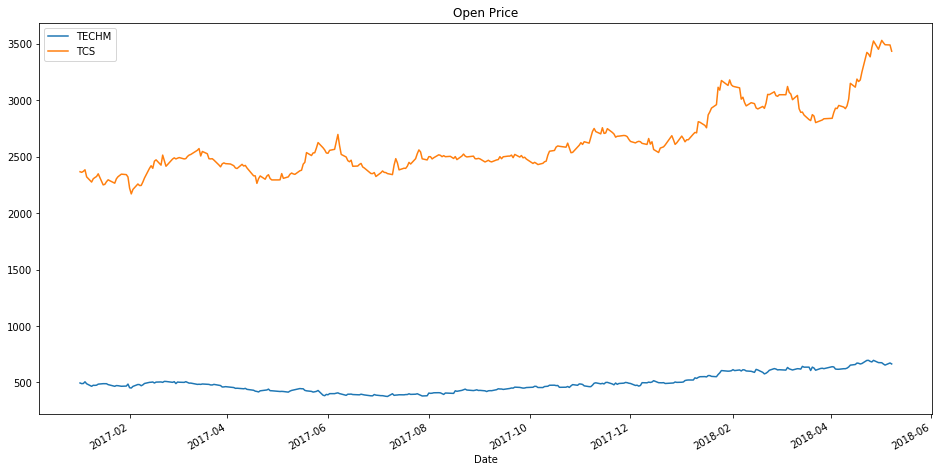

In [19]:
TechM['Open'].plot(label='TECHM',figsize=(16,8),title='Open Price')
TCS['Open'].plot(label='TCS')
plt.legend()

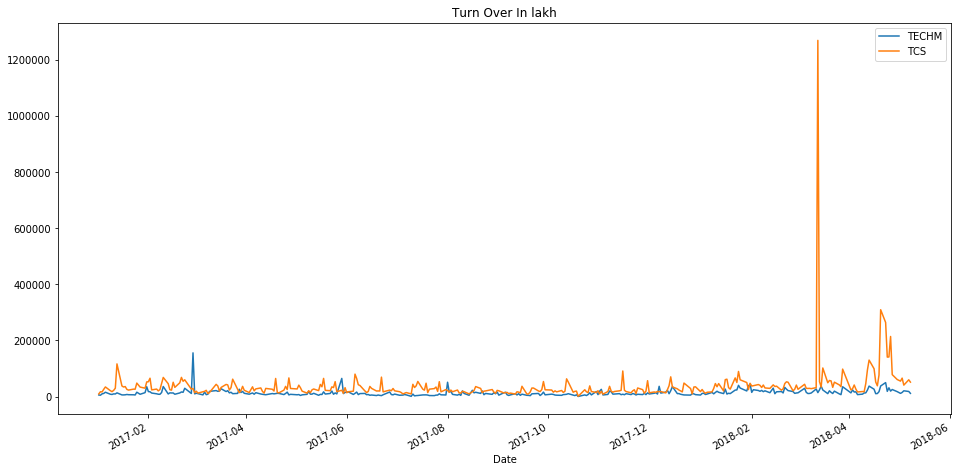

In [20]:
TechM['TurnoverLacs'].plot(label='TECHM' ,figsize=(16,8),title='Turn Over In lakh')
TCS['TurnoverLacs'].plot(label='TCS')
plt.legend()

In [22]:
TCS['TurnoverLacs'].argmax()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2018-03-13 00:00:00')

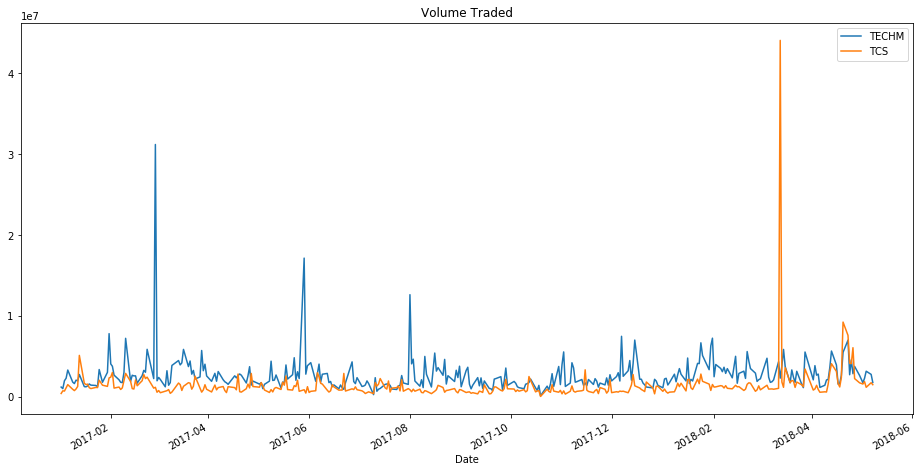

In [23]:
TechM['TotalTradeQuantity'].plot(label='TECHM',figsize=(16,8),title='Volume Traded')
TCS['TotalTradeQuantity'].plot(label='TCS')
plt.legend()

### CandleSticks

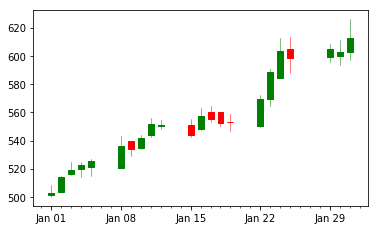

In [28]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
TechM_reset = TechM.loc['2018-01':'2018-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
TechM_reset['date_ax'] = TechM_reset['Date'].apply(lambda date: date2num(date))
TechM_values = [tuple(vals) for vals in TechM_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, TechM_values, width=0.6, colorup='g',colordown='r');

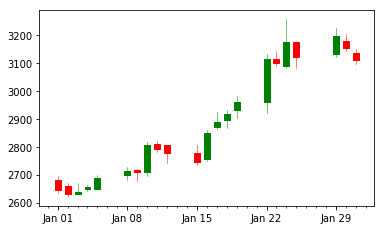

In [29]:
# Rest the index to get a column of January Dates
TCS_reset = TCS.loc['2018-01':'2018-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
TCS_reset['date_ax'] = TCS_reset['Date'].apply(lambda date: date2num(date))
TCS_values = [tuple(vals) for vals in TCS_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, TCS_values, width=0.6, colorup='g',colordown='r');

### Daily percentage Return

In [30]:
TechM['returns'] = TechM['Close'].pct_change(1)

In [31]:
TechM.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns
Date,,,,,,,,
2018-05-08,663.00,666.4,651.05,652.10,653.35,1771130.0,11648.36,NaN
2018-05-07,671.75,675.5,654.20,657.10,657.40,2770174.0,18367.36,0.006199
2018-05-04,652.95,665.6,636.45,663.00,662.65,3162498.0,20737.12,0.007986
2018-05-03,662.55,667.0,645.90,649.95,652.95,2284475.0,14936.84,-0.014638
2018-05-02,674.00,674.0,655.50,661.50,662.55,1745715.0,11552.95,0.014703


In [32]:
TCS['returns'] = TCS['Close'].pct_change(1)

In [33]:
TCS.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns
Date,,,,,,,,
2018-05-08,3434.7,3486.5,3396.7,3440.20,3441.20,1496410.0,51593.22,NaN
2018-05-07,3490.0,3490.0,3410.9,3428.00,3420.95,1742213.0,59904.35,-0.005885
2018-05-04,3492.0,3497.0,3470.0,3479.00,3480.75,1173622.0,40902.42,0.017481
2018-05-03,3509.8,3526.0,3470.4,3481.75,3481.85,1880775.0,65856.82,0.000316
2018-05-02,3530.5,3532.2,3471.3,3500.00,3499.75,1579023.0,55218.26,0.005141


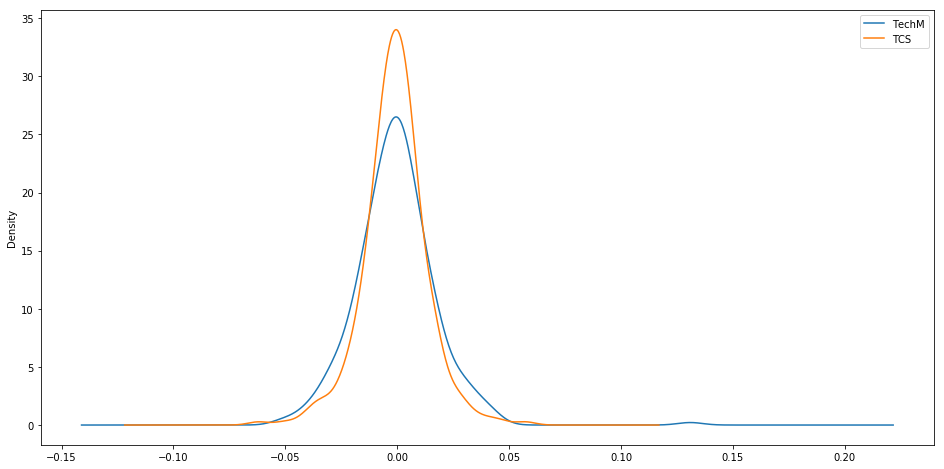

In [34]:
TechM['returns'].plot(kind='kde', label='TechM',figsize=(16,8))
TCS['returns'].plot(kind='kde',label='TCS')
plt.legend()

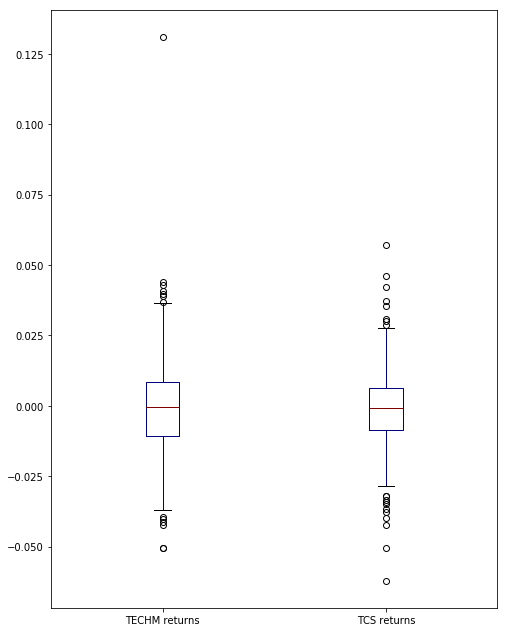

In [35]:
box_df = pd.concat([TechM['returns'], TCS['returns']],axis=1)
box_df.columns = ['TECHM returns','TCS returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

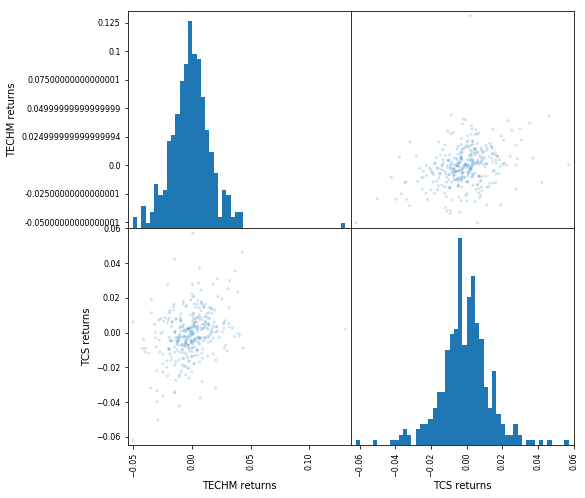

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

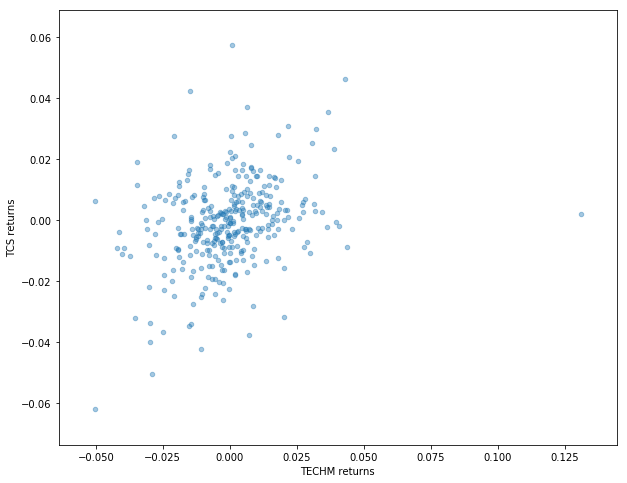

In [37]:
box_df.plot(kind='scatter',x='TECHM returns',y='TCS returns',alpha=0.4,figsize=(10,8))

### Cumulative Daily Returns

In [38]:
TechM['Cumulative Return'] = (1 + TechM['returns']).cumprod()

In [39]:
TCS['Cumulative Return'] = (1 + TCS['returns']).cumprod()

In [40]:
TechM.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns,Cumulative Return
Date,,,,,,,,,
2018-05-08,663.00,666.4,651.05,652.10,653.35,1771130.0,11648.36,NaN,NaN
2018-05-07,671.75,675.5,654.20,657.10,657.40,2770174.0,18367.36,0.006199,1.006199
2018-05-04,652.95,665.6,636.45,663.00,662.65,3162498.0,20737.12,0.007986,1.014234
2018-05-03,662.55,667.0,645.90,649.95,652.95,2284475.0,14936.84,-0.014638,0.999388
2018-05-02,674.00,674.0,655.50,661.50,662.55,1745715.0,11552.95,0.014703,1.014081


In [41]:
TCS.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,returns,Cumulative Return
Date,,,,,,,,,
2018-05-08,3434.7,3486.5,3396.7,3440.20,3441.20,1496410.0,51593.22,NaN,NaN
2018-05-07,3490.0,3490.0,3410.9,3428.00,3420.95,1742213.0,59904.35,-0.005885,0.994115
2018-05-04,3492.0,3497.0,3470.0,3479.00,3480.75,1173622.0,40902.42,0.017481,1.011493
2018-05-03,3509.8,3526.0,3470.4,3481.75,3481.85,1880775.0,65856.82,0.000316,1.011813
2018-05-02,3530.5,3532.2,3471.3,3500.00,3499.75,1579023.0,55218.26,0.005141,1.017014


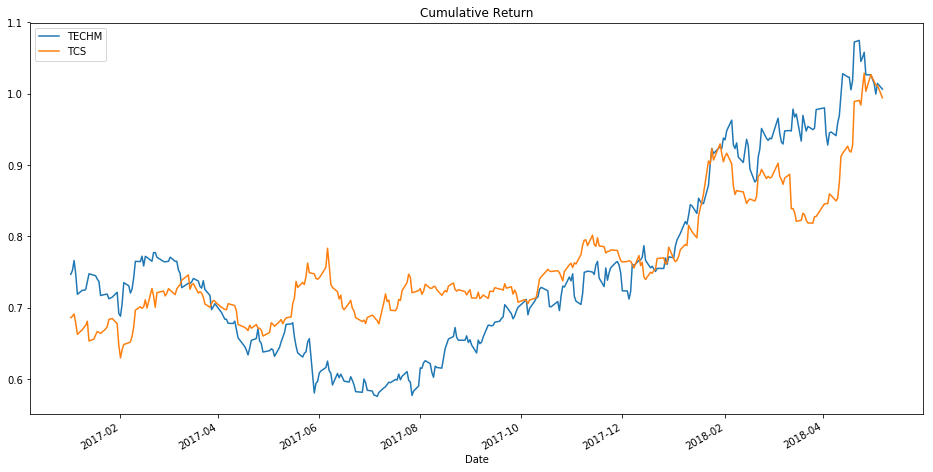

In [42]:
TechM['Cumulative Return'].plot(label='TECHM',figsize=(16,8),title='Cumulative Return')
TCS['Cumulative Return'].plot(label='TCS')
plt.legend()

###  TECH MAHINDRA VS TCS WHO WINS YOU DECIDE